In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [213]:
df = pd.read_csv('final_asset_classes.csv', index_col=0, parse_dates=True)

In [214]:
df.tail()

,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
Date,,,,,,,
2024-10-31,3.403949,1.760852,1.571972,4.821619,1.560736,1.690935,1.571325
2024-11-01,3.431445,1.767331,1.570132,4.814647,1.558476,1.693507,1.575503
2024-11-04,3.414243,1.755107,1.572360,4.760867,1.561720,1.695456,1.578743
2024-11-05,3.431897,1.751329,1.569726,4.840052,1.559328,1.687572,1.568884
2024-11-06,3.552570,1.719811,1.571671,5.091889,1.558537,1.702074,1.576408


In [215]:
df.describe()

,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
count,4978.000000,4933.000000,4856.000000,4951.000000,4947.000000,4864.000000,4855.000000
mean,1.607546,1.411812,1.403738,1.713959,1.411081,1.434617,1.406596
std,0.705900,0.460892,0.254918,1.048453,0.266915,0.290897,0.255624
min,0.554699,0.392264,0.968935,0.243334,0.965870,0.913357,0.965871
25%,1.027655,1.012815,1.179637,0.951597,1.165409,1.192789,1.181953
50%,1.464879,1.487423,1.471435,1.397942,1.476972,1.550671,1.474718
75%,2.010514,1.750064,1.608090,2.069297,1.620381,1.666840,1.611563
max,3.552570,2.416112,1.796342,5.091889,1.842570,1.881555,1.800118


In [216]:
monthly_stats = df.resample('ME').agg(['mean', 'median', 'min', 'max', 'std'])

yearly_stats = df.resample('YE').agg(['mean', 'median', 'min', 'max', 'std'])

In [217]:
monthly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2005-10-31  0.996602  0.995834  0.983613  1.011656  0.006830  0.976514   
2005-11-30  1.051403  1.054217  1.010554  1.077336  0.017349  1.016044   
2005-12-31  1.079926  1.079347  1.069268  1.090455  0.006266  1.035799   
2006-01-31  1.087779  1.087936  1.061617  1.103723  0.012135  1.097440   
2006-02-28  1.107042  1.107418  1.094020  1.131043  0.010315  1.151335   

                                                    ... FTWBIGUSDT            \
              median       min       max       std  ...       mean    median   
Date                                                ...                        
2005-10-31  0.973418  0.962602  1.003231  0.013304  ...   0.997159  0.997012   
2005-11-30  1.019570  0.982750  1.030494  0.013205  ...   1.000881  1.001308   
2005-12-31  1.040719  1.019482  1.053061  0.011694  ...   1.004981  1.005258   
2006-01-31  1.070713  1.056545  1.587238  0.110481  ...   1.001194  1.002492   
2006-02-28  1.153059  1.115025  1.198331  0.026485  ...   1.003656  1.004725   

                                         FTSECORPALT                      \
                 min       max       std        mean    median       min   
Date                                                                       
2005-10-31  0.988982  1.006025  0.004553    0.996073  0.995510  0.988554   
2005-11-30  0.987719  1.008742  0.005462    0.987455  0.988074  0.979499   
2005-12-31  0.995198  1.014210  0.004979    0.995719  0.995152  0.991899   
2006-01-31  0.993703  1.009868  0.004906    0.998215  0.998474  0.992302   
2006-02-28  0.993795  1.011404  0.004641    0.993360  0.993615  0.989888   

                                
                 max       std  
Date                            
2005-10-31  1.005194  0.004248  
2005-11-30  0.993322  0.003831  
2005-12-31  1.006078  0.003351  
2006-01-31  1.002944  0.003673  
2006-02-28  0.997934  0.002131  

[5 rows x 35 columns]

In [218]:
yearly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2005-12-31  1.047248  1.060264  0.983613  1.090455  0.035116  1.012746   
2006-12-31  1.093559  1.101661  1.007351  1.152148  0.036213  1.265923   
2007-12-31  1.164744  1.167423  1.054753  1.228576  0.036341  1.393871   
2008-12-31  0.888819  0.924052  0.629092  1.106326  0.117829  0.888242   
2009-12-31  0.716762  0.709632  0.554699  0.833691  0.065640  0.614299   

                                                    ... FTWBIGUSDT            \
              median       min       max       std  ...       mean    median   
Date                                                ...                        
2005-12-31  1.021398  0.962602  1.053061  0.026720  ...   1.001339  1.001557   
2006-12-31  1.241755  1.056545  1.587238  0.125046  ...   0.978607  0.976744   
2007-12-31  1.404492  1.021649  1.670320  0.187123  ...   0.959026  0.956495   
2008-12-31  0.912607  0.513878  1.121622  0.177032  ...   0.983953  0.965722   
2009-12-31  0.581668  0.392264  0.777878  0.103237  ...   1.093885  1.091690   

                                         FTSECORPALT                      \
                 min       max       std        mean    median       min   
Date                                                                       
2005-12-31  0.987719  1.014210  0.005873    0.992825  0.993368  0.979499   
2006-12-31  0.949562  1.011404  0.015080    0.989754  0.991728  0.965871   
2007-12-31  0.932789  0.984760  0.011234    1.001686  1.001144  0.978085   
2008-12-31  0.913357  1.119899  0.057591    1.038142  1.035346  1.001971   
2009-12-31  1.055072  1.144956  0.017699    1.123659  1.120449  1.019024   

                                
                 max       std  
Date                            
2005-12-31  1.006078  0.005524  
2006-12-31  1.016844  0.011575  
2007-12-31  1.026866  0.010628  
2008-12-31  1.112135  0.020496  
2009-12-31  1.171603  0.029963  

[5 rows x 35 columns]

## Now Plotting Dsitrbutions For Daily Returns

Each asset done separately

In [219]:
daily_returns = df.pct_change(fill_method=None).dropna()

In [220]:
daily_returns.describe()

,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
count,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000
mean,0.000312,0.000138,0.000110,0.000388,0.000109,0.000140,0.000125
std,0.010050,0.013355,0.003798,0.013380,0.002943,0.005460,0.006758
min,-0.101210,-0.114930,-0.131238,-0.128207,-0.016023,-0.119517,-0.168802
25%,-0.004163,-0.006095,-0.001107,-0.004999,-0.001416,-0.002413,-0.002273
50%,0.000727,0.000345,0.000167,0.000967,0.000173,0.000020,0.000086
75%,0.005284,0.006868,0.001350,0.006740,0.001610,0.002594,0.002469
max,0.081038,0.095947,0.149201,0.127987,0.020704,0.138173,0.201992


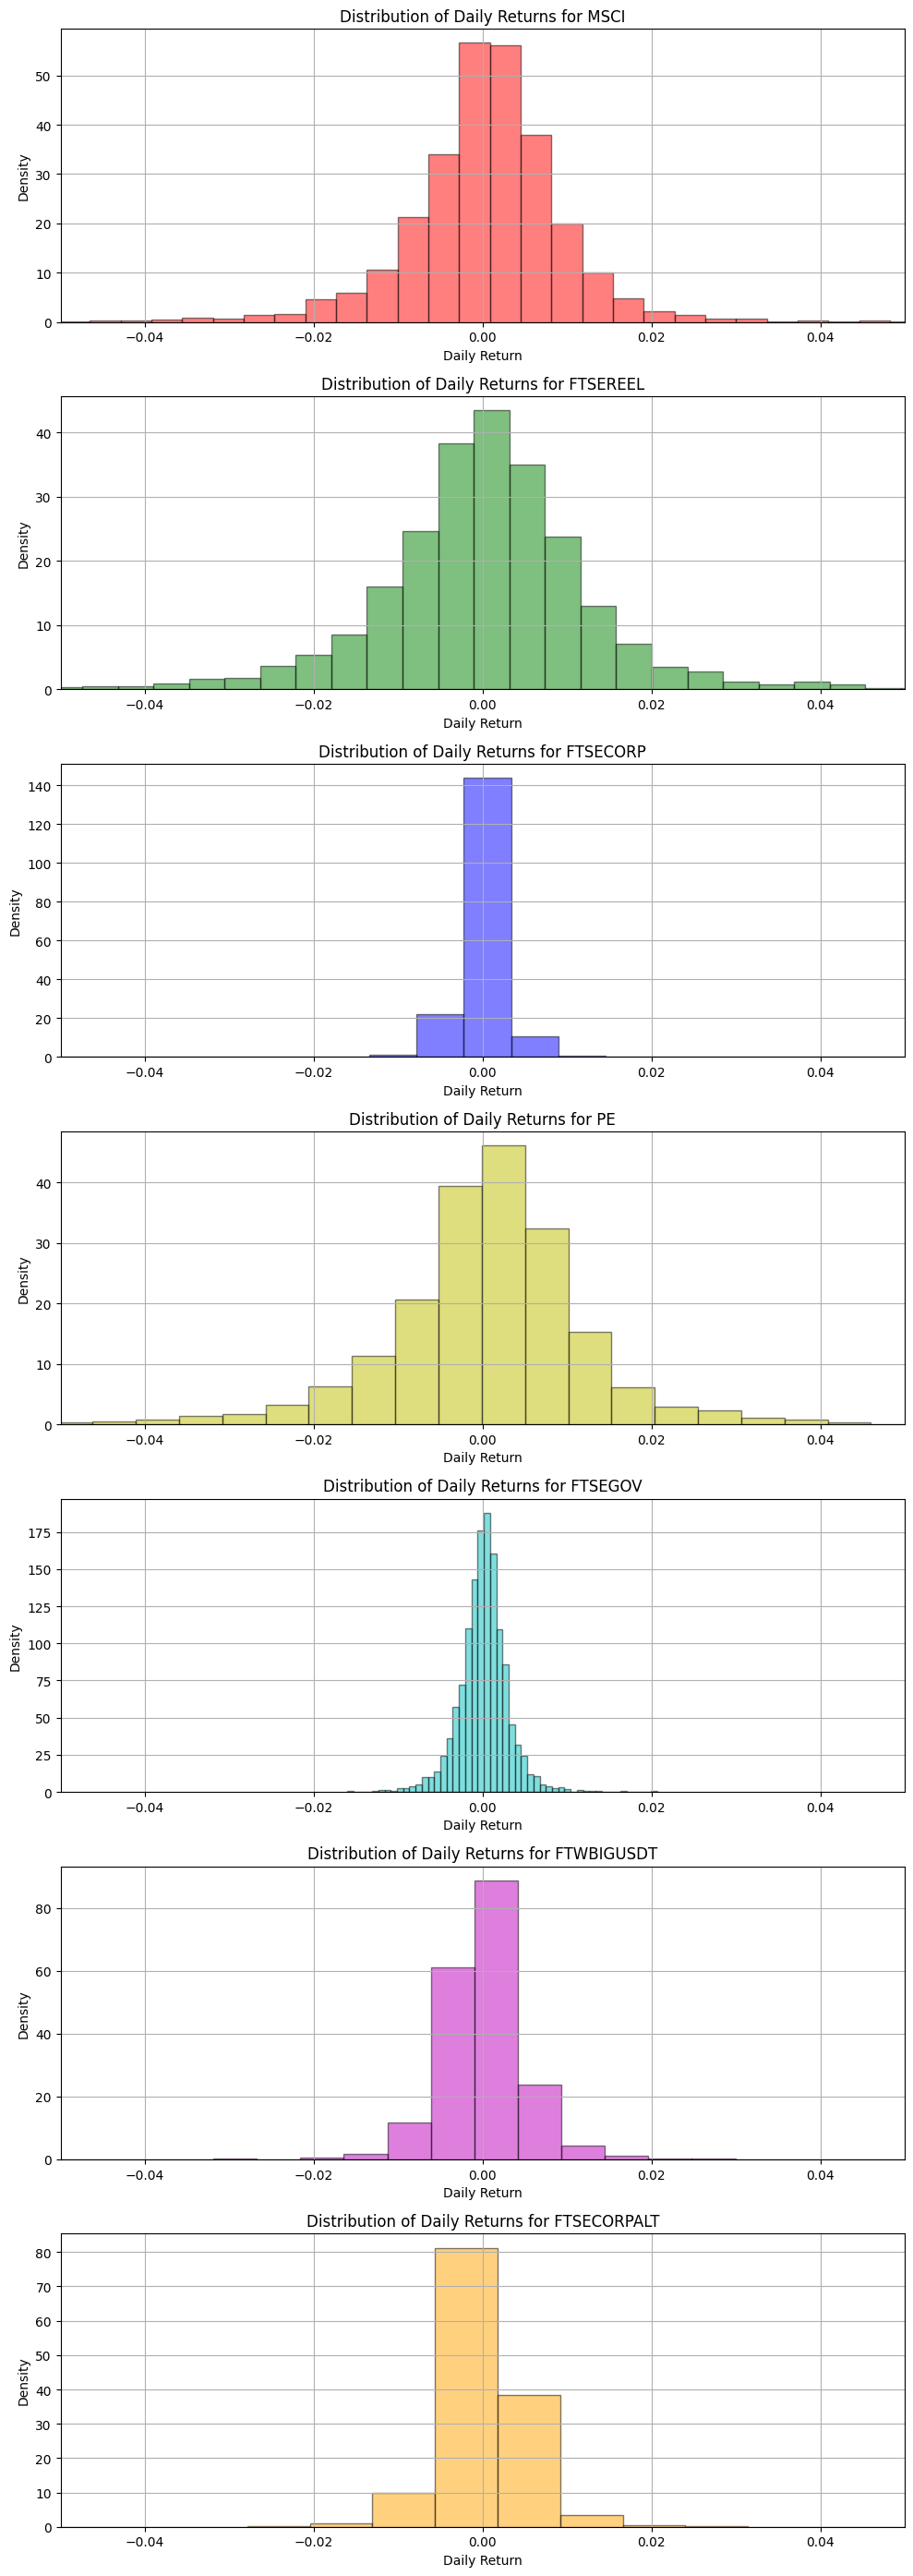

In [221]:

x_min = daily_returns.min().min()  # Overall minimum daily return
x_max = daily_returns.max().max()  # Overall maximum daily return

x_min, x_max = -0.05, 0.05  # Adjust as needed

num_columns = len(daily_returns.columns)


fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns))


colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']


for i, column in enumerate(daily_returns.columns):
    axes[i].hist(
        daily_returns[column].dropna(),
        bins=50,
        color=colors[i % len(colors)],
        alpha=0.5,
        density=True,
        edgecolor='black'
    )
    axes[i].set_title(f'Distribution of Daily Returns for {column}')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)
    

    axes[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

Done in one graph

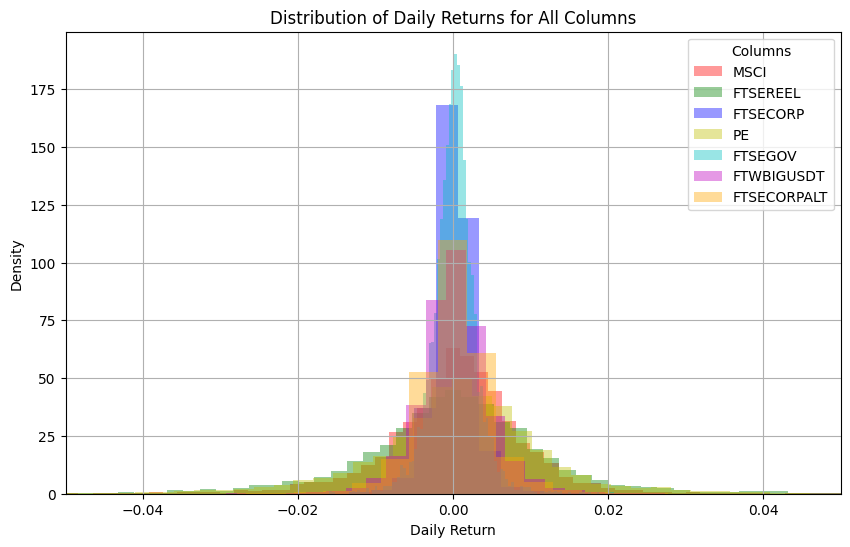

In [222]:
plt.figure(figsize=(10, 6))

# Define colors for each column (extend if necessary)
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']

# Plot histogram for daily returns of each column on the same plot
for i, column in enumerate(daily_returns.columns):
    plt.hist(
        daily_returns[column].dropna(), 
        bins=100, 
        alpha=0.4, 
        color=colors[i % len(colors)],  # Loop through colors if there are more columns than colors
        label=column, 
        density=True  # Show density instead of count
    )

# Set x-axis limits to make the plot narrower
plt.xlim(-0.05, 0.05)  # Adjust this range to control the "narrowness"

# Add title and labels
plt.title('Distribution of Daily Returns for All Columns')
plt.xlabel('Daily Return')
plt.ylabel('Density')

# Add grid and legend
plt.grid(True)
plt.legend(title="Columns", loc='upper right')

# Show the plot
plt.show()